<div style="text-align:center; font-size:2rem">
КПІ ім. І. Сікорського<br>
Телпоенергетичний факультет<br>
Кафедра АПЕПС<br><br>
Лабораторна робота №29<br>
Варіант №17<br><br>
Виконав: <br>
студент гр. ТІ-81<br>
Соломаха О. О.<br><br>
Перевірив:<br>
Сігайов А. О.<br><br>
Київ КПІ 2019<br>
</div>

## Варіант №17

### Завдання №622

Дано дійсні числа $a_1,b_1,c_1,...,a_n,b_n,c_n$. Ця послідонвність визначає на площині $n$ квадратів зі сторонами: 
$a_i,b_i$ - координати центра квадрату, $c_i$ - довжина його сторони. Обчислити площу фігури, отриману усіма квадратами.

Тут може бути корисним попереднє вирішення наступної задачі.
Сторони 2 прямокутників паралельні координатним осям. Кожен із прямокутників задано 4 числами - двома абсцисами та двома ординатами. Показати ту частину першого прямокутника, котра не покривається іншим прямокутником, у вигляді декількох прямокутників, які не накладаються один на одного

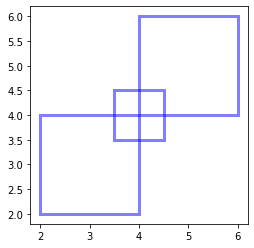

Input = [(3, 3, 2), (4, 4, 1), (5, 5, 2)]
Area = 8.5


In [5]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


def get_intersection_area(a, b):
    '''Get intersected area of 2 rectangles
    Returns:
    float:Intersected area (0 if there is no intersection)
    '''
    l1 = a[0]
    l2 = b[0]
    r1 = a[1]
    r2 = b[1]

    dx = min(r1[0], r2[0]) - max(l1[1], l2[1])
    dy = min(r1[1], r2[1]) - max(l1[1], l2[1])

    if (dx >= 0) and (dy >= 0):
        return dx * dy

    return 0


def get_bl_coord(rectangle_data):
    '''Find the bottom left coordinate of rectangle by given center coordinate'''
    a = rectangle_data[0]
    b = rectangle_data[1]
    c_2 = rectangle_data[2] / 2
    return a - c_2, b - c_2

# Hard-coded input: 3 rectangles
tasks = [(3, 3, 2), (4, 4, 1), (5, 5, 2)]

# !!! UNCOMMENT FOR RANDOMIZED INPUT:
# n = int(input('Enter n: '))
# tasks = [(random.randint(0, 10), random.randint(0, 10), random.randint(1, 6)) for _ in range(n)]

rects = [Rectangle(get_bl_coord(task), task[2], task[2], facecolor='none', edgecolor='b', alpha=0.5, linewidth=3) for task in tasks]

ax = plt.gca()
area = 0

for (i, a) in enumerate(rects):
    ax.add_patch(a)
    area += a.get_height() ** 2
    for (j, b) in enumerate(rects):
        if i != j:   # Exclude current rectangle
            area_i = get_intersection_area(a.get_bbox().get_points(), b.get_bbox().get_points())
            area -= area_i / 2

plt.axis('scaled')
plt.show()

print('Input =', tasks)
print('Area =', area)

